# 06. 최근접 이웃 알고리즘
> 거리기반 모델인 최근접 이웃 알고리즘을 배워보고 실습을 진행해봅시다.

- toc: true 
- badges: true
- comments: true
- categories: [Day 3]
- permalink: /knn
- exec: colab

<br><br>

### 1. 최근접 이웃 알고리즘이란?

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/knnMain.png?raw=True)

이번에 알려드릴 최근접 이웃(Nearest Neighbors) 알고리즘은 지도학습에 활용되는 가장 단순한 종류의 분류/회귀용 알고리즘입니다. 보통 이 알고리즘을 k-NN이라고도 부르는데, 이는 k-Nearest Neighbors의 약자입니다. k-NN 알고리즘은 새로운 데이터 샘플에 대해 예측할 때 가장 가까운 학습 데이터 샘플, 즉 '최근접 이웃'을 찾아 예측에 사용합니다. 이러한 과정은 선형회귀나 로지스틱 회귀처럼 어떠한 함수를 찾아내는 것이 아니라, 다른 데이터 샘플과의 거리 그 자체를 이용해 분류를 진행합니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/knn1.png?raw=True)

위의 그림을 보면 노란색 원과 초록색 별들이 흩어져 있습니다. '노란색 원', '초록색 별'을 같이 각각 동일한 특성을 가진 두 그룹(e.g. 비만 vs 정상)으로 가정할 때, 그림과 같이 이 두 그룹은 '2차원 평면'에 불규칙적으로 분포되어있습니다. 이는 각 그룹들이 '2가지' 특성(e.g. 몸무게, 키)으로 구분된다고 이야기할 수 있습니다. 만약 3가지 특성(e.g. 몸무게, 키, 체지방량)으로 구분되는 것이라면 3차원 공간에 표현해야겠지요. 
<br><br>

자, 이제 여기에 삼각형으로 표현되는 새로운 데이터 샘플이 하나 등장 했다고 가정합시다. 새로운 샘플은 노란색 원 또는 초록색 별 중 하나가 되야 합니다. 이 경우 새로운 샘플은 노란색 원 그룹에 속할까요, 아니면 초록색 별 그룹에 속할까요?  이를 분류할 수 있는 한 가지 방법은 **데이터 셋에서 가장 가깝게 위치하는 샘플이 속해 있는 그룹으로 분류**하는 것입니다. 위 그림의 경우 새로운 샘플과는 **초록색 별**이 가장 가까이 있으므로, 이 샘플을 **초록색 별 그룹으로 분류하면 됩니다.** 이와 같이 가장 가까이 존재하는 샘플과 같은 그룹으로 분류하는 방법을 'Nearest Neighbor' 라고 합니다.   
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/knn2.png?raw=True)


그런데 이 방법에는 약간 문제가 있어 보입니다. 위 그림을 보면 새로운 샘플 근처에 제일 가깝게 있는 데이터는 초록색 별이지만 **조금만 범위를 넓혀보면 근처에 노란색 원이 훨씬 많은 것을 알 수 있습니다.** 다시 말하면, 새로운 샘플인 삼각형과 가장 가까운 샘플의 분포를 보고 판단하면 초록색 별로 그룹을 분류하겠지만, 조금 더 넓혀 가장 가까운 3개의 샘플을 보고 판단하면 삼각형은 노란색 원으로 분류해야 합니다.
<br><br>

이와 같이 모든 샘플들과의 거리를 계산하고, 그 중 가장 가까운 K개 중에서 더 많이 등장하는 클래스로 분류하는 방법을 k-Nearest Neighbors (K-NN) 알고리즘이라고 부릅니다. 위 예제에서는 $k=1$이면 가장 가까운 1개의 데이터는 초록색이고, $k=3$이면 가장 가까운 3개의 데이터는 (노, 노, 초)로 노란색이 더 많습니다.

<br>

### 2. 최근접 이웃 알고리즘의 파라미터
k-NN 모델을 구현할 때, 파라미터(선택사항)은 탐색할 이웃의 수($k$)와 거리의 측정방식 두 가지입니다. 이들에 대해 이해해봅시다. <br><br>

#### 2.1. 탐색할 이웃의 수(k)

탐색할 이웃의 수($k$)는 위에서 언급한 것 처럼, 가장 가까운 몇개의 샘플을 보고 데이터를 분류할지에 대한 것입니다. 제 경험을 들려드리자면, 5 ~ 30개 정도의 $k$값만 설정해도 어느정도 괜찮은 정확도를 보여주는 것 같습니다. 그러나 이것은 절대적으로 여러분이 가진 데이터에 따라 다르기 때문에 만약 $k-NN$ 알고리즘을 사용하신다면 **여러번 실험을 하여 결정하는 것을 권장**합니다. <br><br>

#### 2.2. 거리 측정 방법
k-NN 알고리즘의 거리측정 방법에는 여러가지 방법이 존재하며 앞서 선형대수학 시간에 배운 거리 측정 방법인 유클리디안($\sum \sqrt{(x_2 - x_1)^2}$), 맨하탄 거리($\sum |x_2 - x_1|$), 민코프스키 거리($\sum \sqrt{p}{(x_2 - x_1)^2}$) 등을 적용 할 수 있습니다.
<br><br>

### 2. k-NN예제

... 작성중
<br><br>

### 3. k-NN의 장점

k-NN 알고리즘의 핵심은 이 것입니다. 로지스틱회귀와 같이 분류를 위한 '선'을 찾아내는 다른 머신러닝 모델들은 특수하게 튀는 데이터들에 의해 큰 영향을 받습니다. 아래의 예제를 봅시다.

In [4]:
#collpase-hide

#collapse-hide
from matplotlib import pyplot as plt


def draw_weight_graph(data, boundary, title):
    """
    정상과 비만 데이터를 그래프로 표시하는 함수입니다.

    :param data: 표시할 데이터프레임
    :param boundary: 데이터 클래스를 구분하는 선
    """

    normal_people = data[data['비만(정답)']=='정상']
    fat_people = data[data['비만(정답)'] == '비만']
    qeury_person = data[data['비만(정답)'] == '???']

    plt.scatter(normal_people['신장'], normal_people['몸무게'], label='normal') 
    # 정상 데이터
    plt.scatter(fat_people['신장'], fat_people['몸무게'], label='fat') 
    # 비만 데이터
    plt.scatter(qeury_person['신장'], qeury_person['몸무게'], label='question') 
    # 쿼리 데이터 (맞출 문제)
    plt.plot(*boundary) 
    # 데이터 클래스를 구분할 수 있는 선

    plt.title(title)
    plt.xlabel('height')
    plt.ylabel('weight')
    plt.legend(loc='upper left')
    plt.grid(True)    
    plt.xlim(160, 200)
    plt.show()
    plt.close()

In [2]:
#collapse-hide
import pandas as pd

weight_df = pd.DataFrame(
    columns=['이름', '신장' , '몸무게', '비만(정답)'],

    data=[['도람푸', 177, 76, '정상'],
          ['핵정은', 165, 85, '비만'],
          ['김병만', 165, 61, '정상'],     
          ['김준현', 180, 105, '비만'],    
          ['오지헌', 178, 72, '정상'],    
          ['유재석', 176, 71, '정상'],
          ['강호동', 178, 98, '비만'],  
          ['저팔계', 177, 89, '???'],  
          ['문세윤', 176, 92, '비만'],    
          ['김철수', 174, 70, '정상'],    
          ['안상수', 180, 69, '정상'],    
          ['스윙스', 170, 90, '비만'],    
          ['한요한', 174, 70, '정상'],    
          ['슈퍼비', 166, 63, '정상'],
          ['유민상', 180, 110, '비만']]
)

weight_df.head(20)

,이름,신장,몸무게,비만(정답)
0,도람푸,177,76,정상
1,핵정은,165,85,비만
2,김병만,165,61,정상
3,김준현,180,105,비만
4,오지헌,178,72,정상
5,유재석,176,71,정상
6,강호동,178,98,비만
7,저팔계,177,89,???
8,문세윤,176,92,비만
9,김철수,174,70,정상


이전에 봤었던 비만-정상 데이터셋입니다. 이 데이터는 아래와 같이 그려집니다.

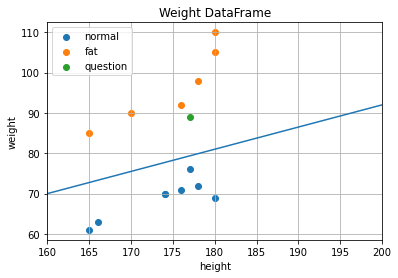

In [5]:
#collapse-hide
draw_weight_graph(weight_df, ([160, 200], [70, 92]), "Weight DataFrame")

로지스틱 회귀모형과 같은 일반적인 분류 모델들은 위와 같이 데이터를 나누는 일종의 선을 찾습니다. 이러한 선은 직선이 될 수도, 곡선이 될 수도 있습니다. 우리는 비만인지 아닌지 모르는 데이터인 '저팔계'의 비만 여부를 맞추고자 합니다. 다른 데이터들을 보고 저팔계를 성공적으로 분류해냈습니다.
<br><br>

그러나 이러한 선을 찾을 때 데이터에 크게 영향을 받게 됩니다. 따라서 만약 특이 케이스인 '최홍만'이 입력되면 그래프는 아래처럼 변하게 됩니다.

In [132]:
#collapse-hide
import pandas as pd

new_weight_df = pd.DataFrame(
    columns=['이름', '신장' , '몸무게', '비만(정답)'],

    data=[['도람푸', 177, 76, '정상'],
          ['핵정은', 165, 85, '비만'],
          ['김병만', 165, 61, '정상'],     
          ['김준현', 180, 105, '비만'],    
          ['오지헌', 178, 72, '정상'],    
          ['유재석', 176, 71, '정상'],
          ['강호동', 178, 98, '비만'],  
          ['저팔계', 177, 89, '???'],  
          ['문세윤', 176, 92, '비만'],    
          ['김철수', 174, 70, '정상'],    
          ['안상수', 180, 69, '정상'],    
          ['스윙스', 170, 90, '비만'],    
          ['한요한', 174, 70, '정상'],    
          ['슈퍼비', 166, 63, '정상'],
          ['유민상', 180, 110, '비만'],
          ['최홍만', 195, 107, '정상']]
)

new_weight_df.head(20)

,이름,신장,몸무게,비만(정답)
0,도람푸,177,76,정상
1,핵정은,165,85,비만
2,김병만,165,61,정상
3,김준현,180,105,비만
4,오지헌,178,72,정상
5,유재석,176,71,정상
6,강호동,178,98,비만
7,저팔계,177,89,???
8,문세윤,176,92,비만
9,김철수,174,70,정상


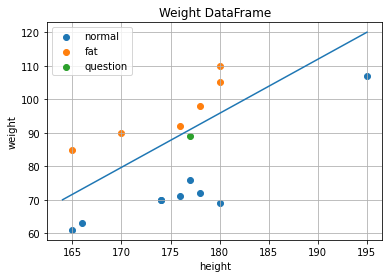

In [133]:
#collapse-hide
draw_weight_graph(new_weight_df, ([164, 195], [70, 120]), "Weight DataFrame")

최홍만과 같은 특이 케이스 데이터를 우리는 'Outlier(아웃 라이어)'라고 부릅니다. 일반적인 분류 모델들은 이러한 아웃라이어에 의해 그룹을 나누는 선이 크게 영향을 받게 됩니다. 위 예제에서도 이에 따라 기존에 잘 예측하였던 샘플인 '저팔계'가 잘못 예측되어 정확도가 감소하였습니다.

In [134]:
#collapse-hide
from matplotlib import pyplot as plt


def draw_weight_graph_with_center(data, center, radius, title):
    """
    정상과 비만 데이터를 그래프로 표시하는 함수입니다.

    :param data: 표시할 데이터프레임
    :param boundary: 데이터 클래스를 구분하는 선
    """

    normal_people = data[data['비만(정답)']=='정상']
    fat_people = data[data['비만(정답)'] == '비만']
    qeury_person = data[data['비만(정답)'] == '???']

    plt.scatter(normal_people['신장'], normal_people['몸무게'], label='normal') 
    # 정상 데이터
    plt.scatter(fat_people['신장'], fat_people['몸무게'], label='fat') 
    # 비만 데이터
    plt.scatter(qeury_person['신장'], qeury_person['몸무게'], label='question') 
    # 쿼리 데이터 (맞출 문제)
    plt.scatter(*center, s=radius, facecolors='none', edgecolors='g')

    plt.title(title)
    plt.xlabel('height')
    plt.ylabel('weight')
    plt.legend(loc='upper left')
    plt.grid(True)    
    plt.show()
    plt.close()

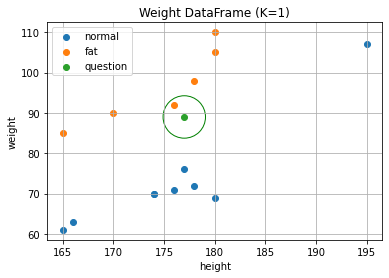

In [140]:
#collapse-hide
draw_weight_graph_with_center(new_weight_df, (177,89), 1800, "Weight DataFrame (K=1)")


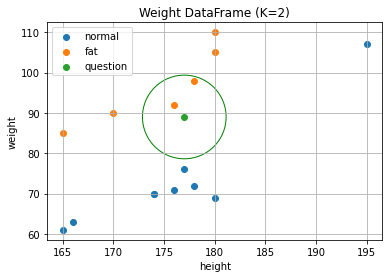

In [142]:
#collapse-hide
draw_weight_graph_with_center(new_weight_df, (177,89), 7000, "Weight DataFrame (K=2)")


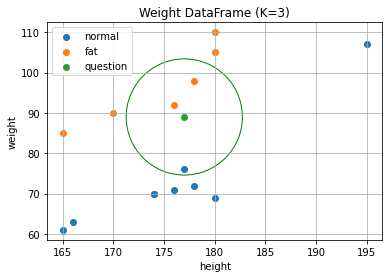

In [143]:
#collapse-hide
draw_weight_graph_with_center(new_weight_df, (177,89), 13500, "Weight DataFrame (K=3)")


그러나 K-NN은 단지 가장 가까운 K개의 데이터만 보기 때문에 K=1, 2, 3인 경우에 모두 정확하게 비만으로 예측해냅니다. 이렇게 K-NN은 아웃라이어에 굉장히 강인한(Robust) 모델입니다. 따라서 여러분의 데이터에 이렇게 튀는 아웃라이어 데이터가 많다면, K-NN 알고리즘의 사용을 고려해보세요.


<br><br>

### 4. K-NN의 단점 
![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/knn_slow.jpg?raw=True)

그러나 K-NN 알고리즘 역시 단점이 존재합니다. 한번 검색할 때, 모든 데이터와의 거리를 비교해야한다는 단점이 있습니다. 때문에, 만약 10,000개의 데이터가 있다면 모든 샘플들과의 거리 값 10,000개를 계산하고 그 중 가장 작은 K개의 거리를 찾아야합니다. 때문에 데이터가 100,000,000개로 늘어나면 100,000,000번 비교를 계산해야합니다. 이럴 경우 검색속도가 지나치게 느리게 됩니다. 다른 모델의 경우, 선이나 트리 등의 구조를 만들어놓고 그 구조만 저장합니다. 그래서 새로운 데이터가 들어오면 그 구조에 입력해서 비교를 수행하지만, K-NN은 모든 데이터의 특징과 전부 비교하고, 모든 거리값을 정렬해서 가장 낮은 $k$개만 찾아내기 때문에 정말 느립니다.
<br><br>

이러한 문제를 해결하기 위해 Kd-Tree, Ball-Tree 등의 알고리즘을 적용하여 속도를 향상 시킬 수 있으나, 이러한 내용까지 모두 설명하기는 조금 어려우므로 생략하겠습니다. 궁금하신 분들은 검색하셔서 공부하시거나 저에게 물어봐주세요.